<h1><b>Ο αλγόριθμος Πολυωνυμικής Παλινδρόμησης (Polynomial Regression)</b></h1>

<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>πολυωνυμικής παλινδρόμησης</i></b> (<b><i>polynomial regression</i></b>). Για την εκπαίδευση του μοντέλου θα χρησιμοποιήσετε τα δεδομένα του αρχείου <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab1/data2.csv">data2.csv</a></b></i>. Η εφαρμογή αφορά την εκτίμηση των τιμών της πίεσης (pressure) ενός συστήματος δεδομένης της θερμοκρασίας (temperature).</p>

<p align="justify">Στο Notebook αυτό περιλαμβάνονται εντολές για (α) τη φόρτωση των δεδομένων εκπαίδευσης που περιέχονται στο αρχείο <b><i>data2.csv</b></i>, (β) την εκπαίδευση ενός μοντέλου <b><i>linear regression</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης, (γ) την εκπαίδευση ενός μοντέλου <b><i>polynomial regression</i></b> βαθμού <b><i>degree</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης και (δ) την οπτικοποίηση των δεδομένων εκπαίδευσης, καθώς και των γραμμών απόφασης για τα δύο μοντέλα παλινδρόμησης. Για την εκπαίδευση των δύο μοντέλων παλινδρόμησης χρησιμοποιείται η βιβλιοθήκη <b><i>Scikit-Learn</b></i> της <b><i>Python</i></b>. Περισσότερες πληροφορίες για τον αλγόριθμο <b><i>polynomial regression</i></b> και τον κώδικα της άσκησης μπορούν να βρεθούν <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">εδώ</a>.</p>

<p align="justify">Στην άσκηση αυτή, καλείστε να παρατηρήσετε τη μορφή και τις αλλαγές της γραμμής παλινδρόμησης για διαφορετικές τιμές της παραμέτρου <b><i>degree</b></i> βάσει των δεδομένων εκπαίδευσης που παρέχονται.</p>

<p align="justify">Αρχικά, θα εγκαταστήσετε και θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>


In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from time import perf_counter

Στη συνέχεια, θα φορτώσετε τα δεδομένα εκπαίδευσης που παρέχονται από το αρχείο
 <b><i>data2.csv</b></i>.

In [2]:
datas = pd.read_csv('data2.csv')
print(datas)

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           40    0.0500
9    10           45    0.0600
10   11           50    0.0700
11   12           55    0.0800
12   13           60    0.0900
13   14           65    0.1000
14   15           70    0.1100


Τώρα, θα δημιουργήσετε τις μεταβλητές εισόδου και εξόδου για τους αλγορίθμους μηχανικής μάθησης από τα δεδομένα εκπαίδευσης που παρέχονται.

In [3]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

print("Input")

print(X)

print("Labels")

print(y)

Input
[[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]
Labels
[0.0002 0.001  0.0017 0.004  0.02   0.04   0.01   0.034  0.05   0.06
 0.07   0.08   0.09   0.1    0.11  ]


Στη συνέχεια, θα εκπαιδεύσετε το μοντέλο <b><i>linear regression</i></b>, χρησιμοποιώντας τα παραπάνω δεδομένα εκπαίδευσης.

In [4]:
fit_times = {}

In [5]:
lin = LinearRegression()
start = perf_counter()
lin.fit(X, y)
end = perf_counter()
fit_times[1] = end - start

### Σημείωση: Η εντολή "poly.fit(X_poly, y)" έχει μπει παντού σε σχόλιο διότι δεν χρησιμοποιούνταν κάπου στην εκτέλεση των αλγορίθμων και απλώς δημιουργούσε χρονικές καθυστερήσεις. Αφού εξαρχής κάνουμε fit_transform, το ακόλουθο fit όχι μόνο δεν προσθέτει κάτι, αλλά παράγει και αποτελέσματα που δεν χρησιμοποιούνται.

<h3><b><i>Ερώτημα 1</b></i></h3>

<p align="justify">Να εκτελέσετε τα παρακάτω τμήματα κώδικα για τις τιμές της παραμέτρου <b><i>degree</b></i> {<i>2, 3, 4, 5, 8, 10, 12, 15</i>} και να καταγράψετε τα διαγράμματα που παρέχονται ως έξοδοι. Τι αλλαγές παρατηρείτε στη μορφή της γραμμής παλινδρόμησης για το μοντέλο <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>; Τι παρατηρείτε για τον απαιτούμενο χρόνο εκπαίδευσης του μοντέλου <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>;</p>

<br>

**<h4> <b><i>degree</b></i> = 2 </h4>**

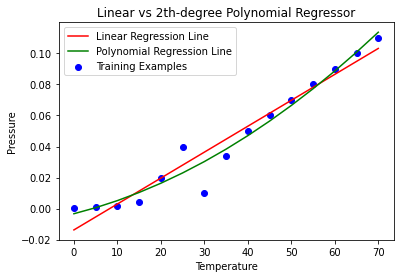

In [6]:
poly = PolynomialFeatures(degree=2)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[2] = end - start


plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 2th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 3 </h4>

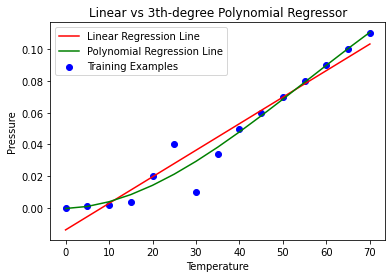

In [7]:
poly = PolynomialFeatures(degree=3)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[3] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 3th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 4 </h4>

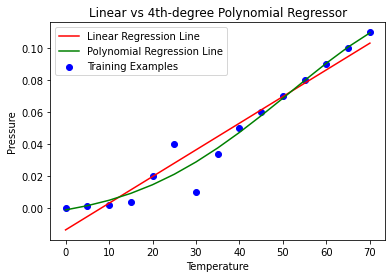

In [8]:
poly = PolynomialFeatures(degree=4)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[4] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 4th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 5 </h4>

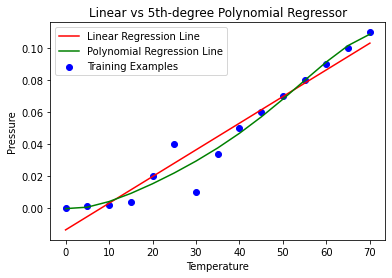

In [9]:
poly = PolynomialFeatures(degree=5)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[5] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 5th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 8 </h4>

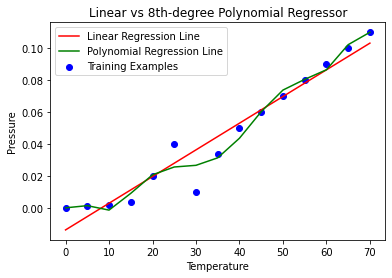

In [10]:
poly = PolynomialFeatures(degree=8)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[8] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 8th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 10 </h4>

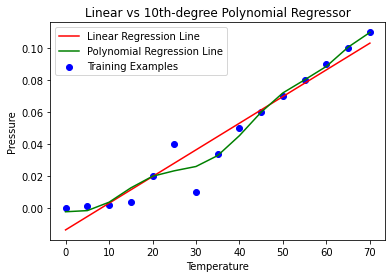

In [11]:
poly = PolynomialFeatures(degree=10)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[10] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 10th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 12 </h4>

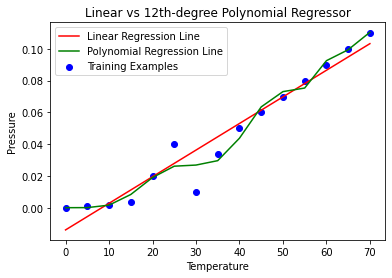

In [12]:
poly = PolynomialFeatures(degree=12)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[12] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 12th-degree Polynomial Regressor")
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 15 </h4>

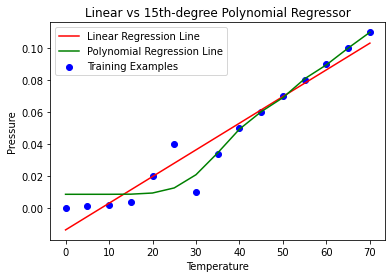

In [13]:
poly = PolynomialFeatures(degree=15)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
fit_times[15] = end - start

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Linear vs 15th-degree Polynomial Regressor")
plt.legend()
plt.show()

In [14]:
pd.DataFrame(sorted(fit_times.items()), columns = ["Degree", "Fit Time (sec)"]).style.hide_index()

Degree,Fit Time (sec)
1,0.017611
2,0.001101
3,0.001408
4,0.000831
5,0.000835
8,0.000787
10,0.001083
12,0.000944
15,0.001081


Σε καθένα από τα παραπάνω διαγράμματα, παρουσιάζεται το linear regression (κόκκινη καμπύλη) και το αντίστοιχο polynomial regression (πράσινη καμπύλη) αντίστοιχου βαθμού. Τα πολυώνυμα μέχρι και 5ου βαθμού προσαρμόζονται πολύ ικανοποιητικά στα δεδομένα και μάλιστα σε αμελητέους χρόνους. Όσο μεγαλώνει ο βαθμός, η παραγόμενη καμπύλη περνάει από όλο και περισσότερα σημεία και έτσι οδηγούμαστε σε overfitting. Δηλαδή, με την άυξηση του βαθμού του πολυωνύμου, αυτό εφαρμάζει καλύτερα στα δεδομένα αλλά χάνει την ικανότητα γενίκευσης. Ο χρόνος του fit είναι σχεδόν αμελητέος γενικότερα. Η αύξηση του βαθμού του πολυωνύμου απαιτεί εύρεση όλο και περισσότερων συντελεστών που θα οδηγεί εν γένει σε αύξηση του χρόνου εκπαίδευσης του μοντέλου.

<h3><b><i>Ερώτημα 2</b></i></h3>

Σας παρέχεται, επίσης, το αρχείο <b><i>data2b.csv</i></b>, το οποίο είναι το αρχείο <b><i>data2.csv</i></b> με μία παραπάνω εγγραφή, την <b><i>(6, 55, 0.1)</i></b>. Να εκτελέσετε το παρακάτω πρόγραμμα για την τιμή της παραμέτρου <b><i>degree = 15</i></b>. Πόσο μεγάλη είναι η αλλαγή που παρατηρείτε στη μορφή της γραμμής παλινδρόμησης σε σχέση με την αντίστοιχη περίπτωση του ερωτήματος 1; Τι συμπέρασμα μπορείτε να βγάλετε για τον αλγόριθμο <b><i>polynomial regression</i></b>;

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           38    0.3000
9    10           40    0.0500
10   11           45    0.0600
11   12           50    0.0700
12   13           55    0.0800
13   14           60    0.0900
14   15           65    0.1000
15   16           70    0.1100
Fit time with outlier is 0.0012374000000008323


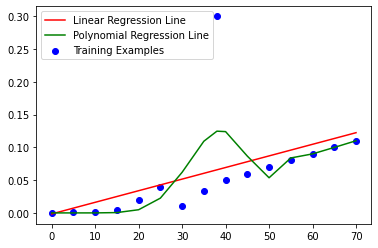

In [15]:
datas = pd.read_csv('data2b.csv')
print(datas)

X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

lin = LinearRegression()
lin.fit(X, y)

poly = PolynomialFeatures(degree=15)
start = perf_counter()
X_poly = poly.fit_transform(X)
# poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
end = perf_counter()
print("Fit time with outlier is {}".format(end - start))

plt.scatter(X, y, color = 'blue', label = 'Training Examples')
plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(X_poly), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

Σε αυτή την περίπτωση παρατηρούμε ότι αυξήθηκε ο χρόνος εκπαίδευσης από 0.8 ms σε 1.2 ms, το οποίο είναι αύξηση της τάξης του 50%. Η έκτοπη χάλασε αναμενόμενα την καμπύλη παλινδρόμησης, διότι το πολυώνυμο 15ου βαθμού είναι πολύ ευαίσθητο σε μεγάλες αλλαγές τιμών. 